In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MYDIR = "./../../ResearchProposal/education/"

print(os.path)
myFiles = os.listdir(MYDIR)
print(myFiles)

print("Done")

myFile = MYDIR + "table-3.xlsx"

<module 'ntpath' from 'C:\\Users\\alexg\\Anaconda3\\lib\\ntpath.py'>
['table-1-1.xlsx', 'table-3.xlsx']
Done


In [2]:
"""Create column for aggregate categories"""
def setAggrCat(dfEd: pd.DataFrame) -> pd.DataFrame:
    """
    get gender into a separate column
    """
    dfEd["aggr_cat"] = ""

    aggr_cat = dfEd[dfEd.all_races.isnull()]
    print(list(aggr_cat.index))

    dfEd.at[aggr_cat.index, "aggr_cat"] = dfEd.loc[aggr_cat.index]["category"]
    for rr in range (1, len(dfEd)):
        if rr in list(aggr_cat.index):
            continue
        else:
            dfEd.at[rr, "aggr_cat"] = dfEd.loc[rr-1, "aggr_cat"]
    dfEd.drop(aggr_cat.index, inplace=True)
    
    return dfEd

"""Get the data from Excel"""
def getDataFromExcel(myFile: str,  sheetName: str = 'Table 3') -> pd.DataFrame:
    
    dfEd = pd.read_excel(myFile, sheet_name=sheetName, na_values="", keep_default_na=False)

    num_rows = len(dfEd)
    print(num_rows)

    dfEd.drop(range(3), inplace=True)

    """Compose Columns"""
    cols1 = list(dfEd.loc[3])
    cols2 = list(dfEd.loc[4])
    dfEd.columns = [str(cols1[ii]) + "_" + str(cols2[ii]) for ii in range(len(cols1))]

    dfEd.drop([cc for cc in dfEd.columns if "Percent" in cc], axis=1, inplace=True)
    dfEd.columns = [cc.replace("_Number", "") for cc in dfEd.columns]
    dfEd.columns = [cc.replace("_nan", "") for cc in dfEd.columns]
    dfEd.columns = [cc.replace(" ", "_") for cc in dfEd.columns]
    dfEd.columns = [cc.lower() for cc in dfEd.columns]
    dfEd.rename(columns={"detailed_years_of_school": "category"}, inplace=True)

    """
    Drop meaningless rows
    """
    footnotes_start = [rr for rr in range(len(dfEd)) if \
                       list(dfEd.category)[rr] == \
                       "A dash (-) represents zero or rounds to zero."]
    if len(footnotes_start) > 0:
        print(f"""dropping {range(footnotes_start[0], num_rows)}""")
        dfEd.drop(dfEd.index[footnotes_start[0]:num_rows], inplace=True)

    dfEd.drop(range(3, 5), inplace=True)    
    dfEd.dropna(axis=0, subset=["category"], inplace=True)

    """
    Reset index
    """
    dfEd.reset_index(drop=True, inplace=True)

    dfEd = setAggrCat(dfEd)
    
    for cc in dfEd.columns:
        if cc in ["category", "aggr_cat"]:
            continue
        dfEd[cc] = dfEd[cc] * 1000
    
    return dfEd

In [3]:
dfEd = getDataFromExcel(myFile)
dfEd

dfEd

61
dropping range(52, 61)
[1, 10, 20, 26, 32]


,category,all_races,males,females,25_to_34_years_old,35_to_54_years_old,55_years_and_older,white,non-hispanic_white,black,asian,hispanic_ (of_any_race),aggr_cat
0,Total,221478000,106695000,114783000,45208000,81727000,94543000,173452000,142557000,27428000,13955000,34575000,
2,"Less than 1 year, no diploma",769000,378000,391000,114000,275000,379000,449000,104000,126000,152000,385000,"Elementary or High school, no diploma"
3,"1st-4th grade, no diploma",1412000,705000,707000,118000,440000,854000,1118000,141000,119000,109000,1073000,"Elementary or High school, no diploma"
4,"5th-6th grade, no diploma",3111000,1624000,1487000,324000,1245000,1542000,2608000,314000,168000,190000,2481000,"Elementary or High school, no diploma"
5,"7th-8th grade, no diploma",3312000,1607000,1705000,355000,1065000,1892000,2594000,1297000,397000,220000,1428000,"Elementary or High school, no diploma"
6,"9th grade, no diploma",3365000,1621000,1744000,483000,1433000,1449000,2649000,1124000,396000,177000,1720000,"Elementary or High school, no diploma"
7,"10th grade, no diploma",3397000,1723000,1674000,529000,1123000,1745000,2453000,1645000,652000,153000,901000,"Elementary or High school, no diploma"
8,"11th grade, no diploma",3940000,2037000,1903000,775000,1419000,1746000,2771000,1930000,905000,92000,951000,"Elementary or High school, no diploma"
9,"12th grade, no diploma",2671000,1412000,1259000,566000,982000,1122000,1874000,1131000,561000,132000,823000,"Elementary or High school, no diploma"
11,"Less than 1 year, GED",33000,14000,19000,12000,14000,7000,24000,12000,7000,2000,11000,"Elementary or High school, GED"


In [4]:
def plotData(myEd: pd.DataFrame, logY: bool = False):
    
    for gg in myEd.aggr_cat.unique():
        print(gg)
        ggEd = myEd.loc[dfEd.aggr_cat == gg].copy()
        ggEd.reset_index(drop=True, inplace=True)
        ax = ggEd.plot(x="category", lw=2.0, figsize=(15, 8))
        ax.set_title(gg, fontsize=14)
        ax.set_xticks(ggEd.index)
        ax.set_xticklabels(list(ggEd.category), rotation=45, fontsize=14)
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, 
                                                             loc: 
                                                             "{:,}".format(int(x))))
        if logY:
            ax.set_yscale("log")
            ax.set_ylabel("(Log scale)")
    
        plt.yticks(fontsize=14)
        plt.legend(fontsize=14)
        plt.show()

Elementary or High school, no diploma


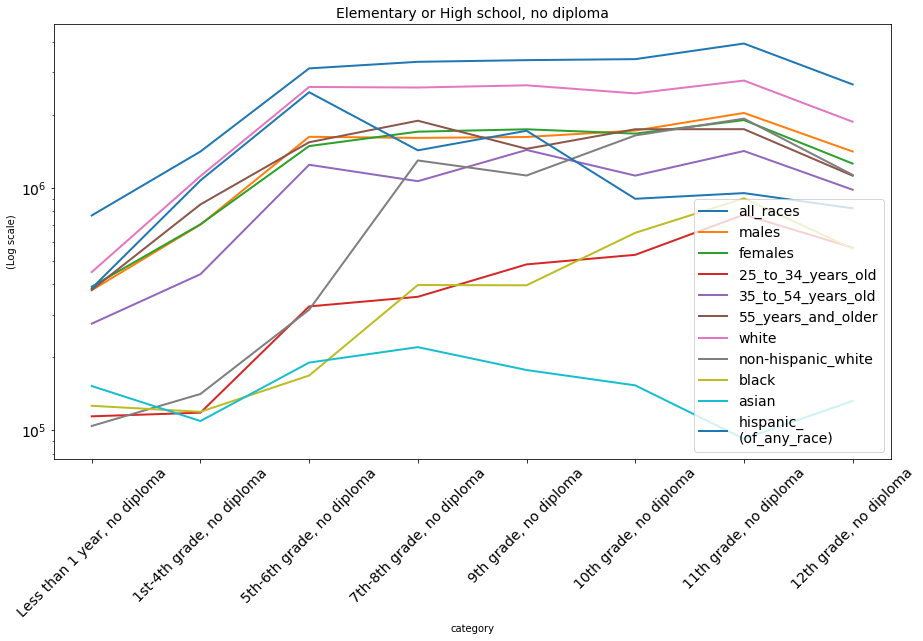

Elementary or High school, GED


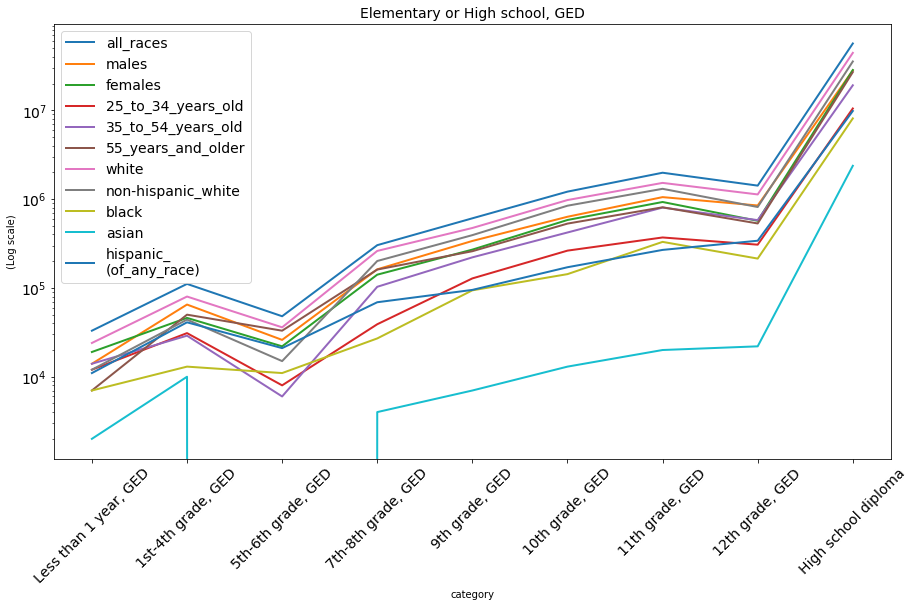

College, no degree


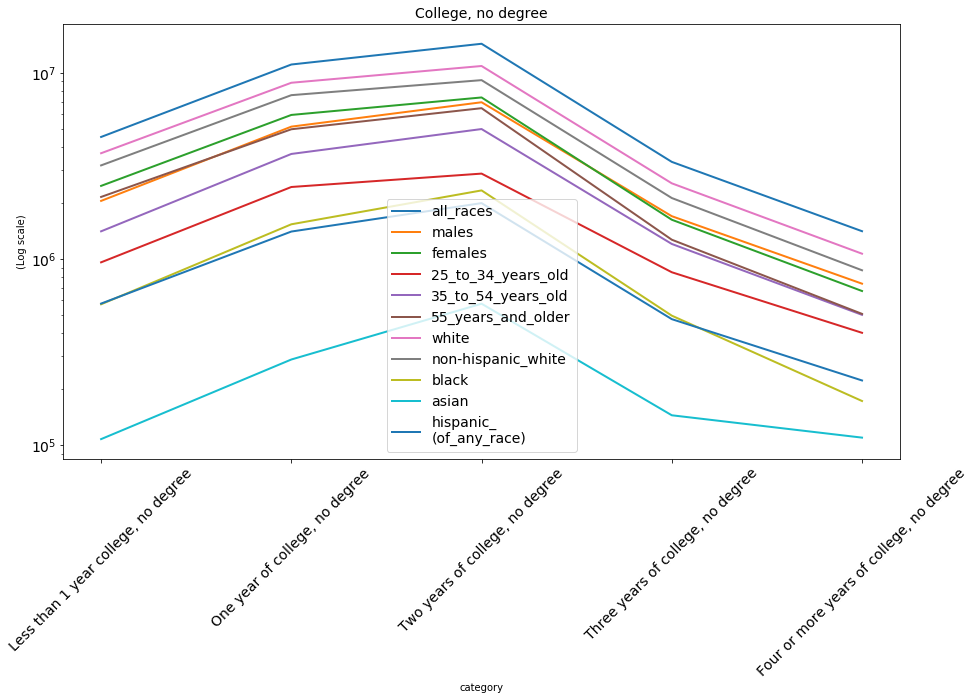

Associate's degree, vocational


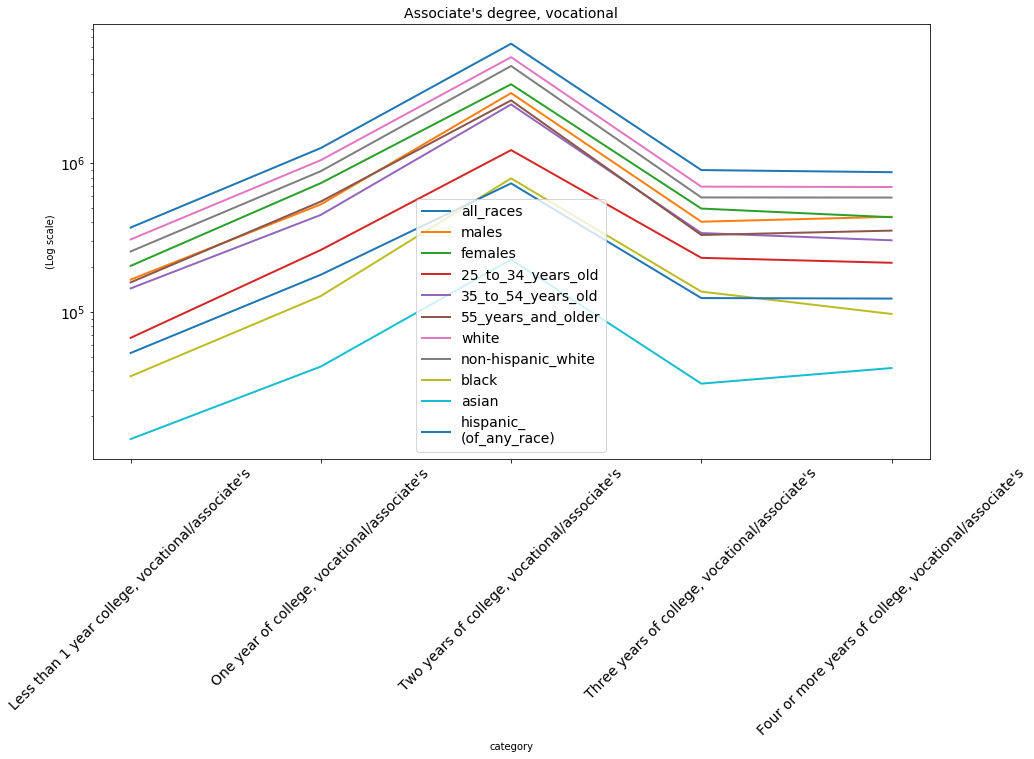

Associate's degree, academic


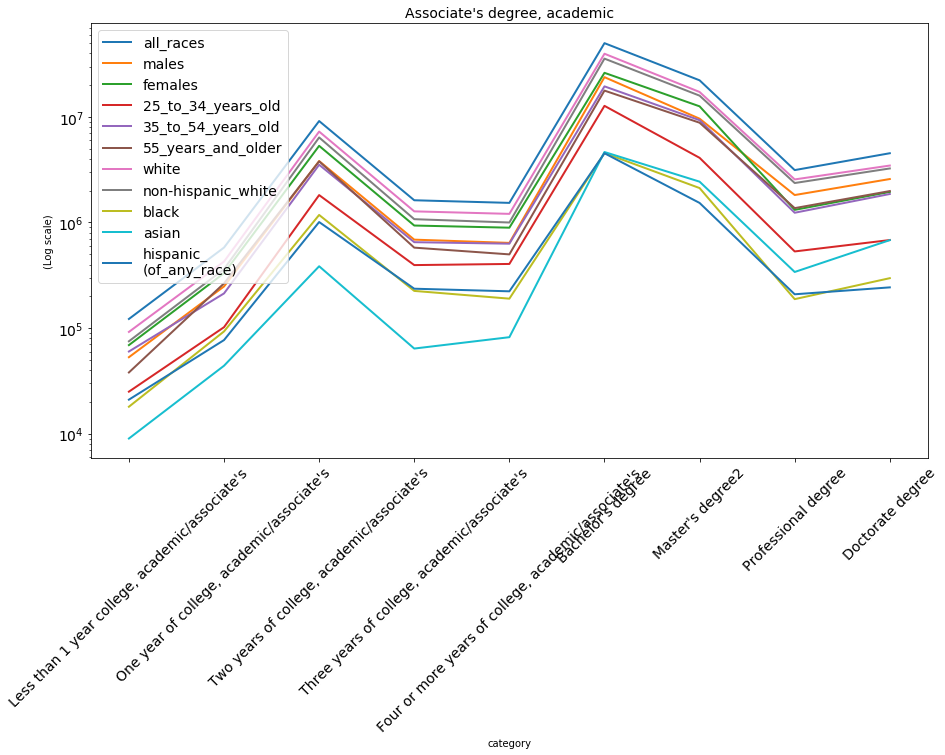

In [5]:
plotData(dfEd.drop(0), logY=True)

In [6]:
dfEd.columns

Index(['category', 'all_races', 'males', 'females', '25_to_34_years_old',
       '35_to_54_years_old', '55_years_and_older', 'white',
       'non-hispanic_white', 'black', 'asian', 'hispanic_\n(of_any_race)',
       'aggr_cat'],
      dtype='object')

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
Education Level by Age Group

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
Elementary or High school, no diploma


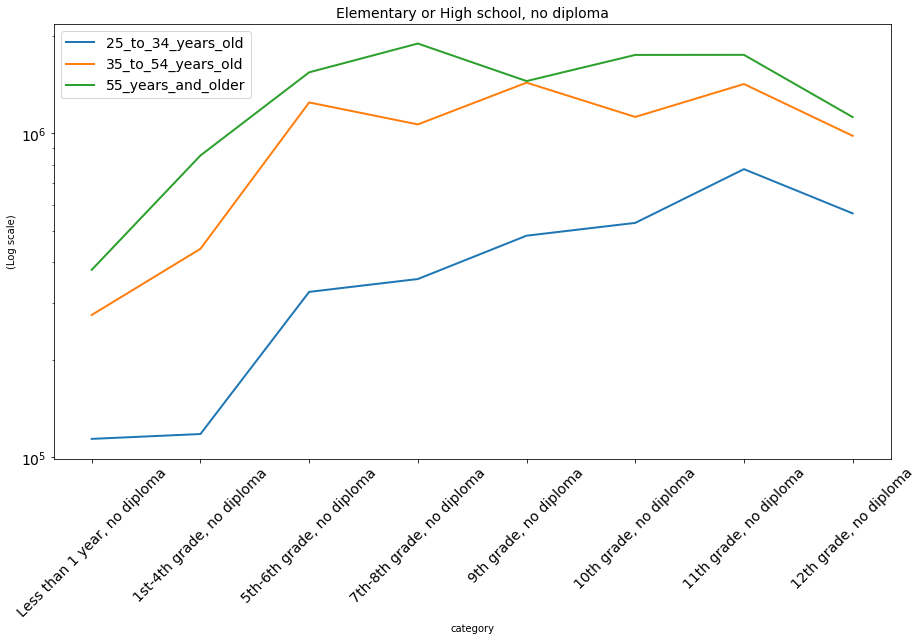

Elementary or High school, GED


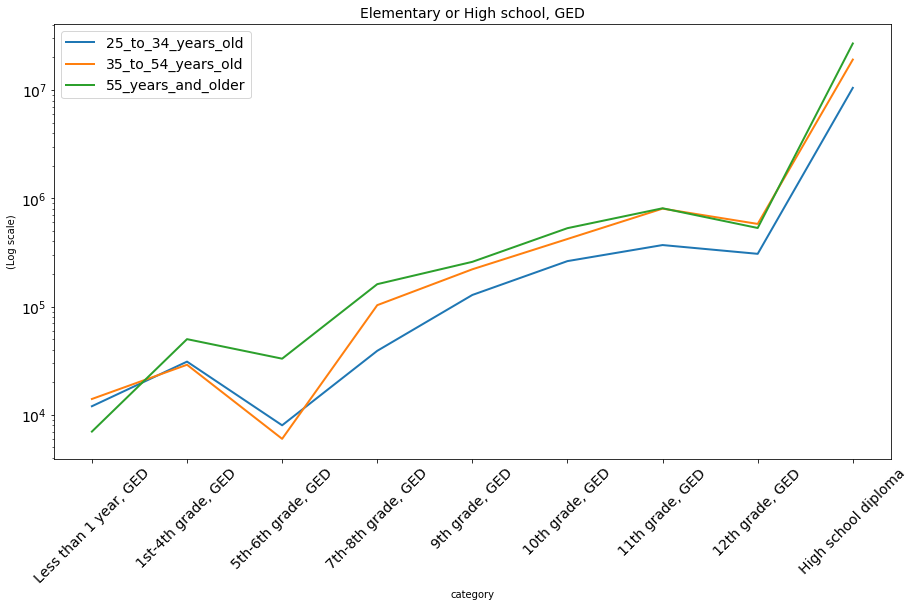

College, no degree


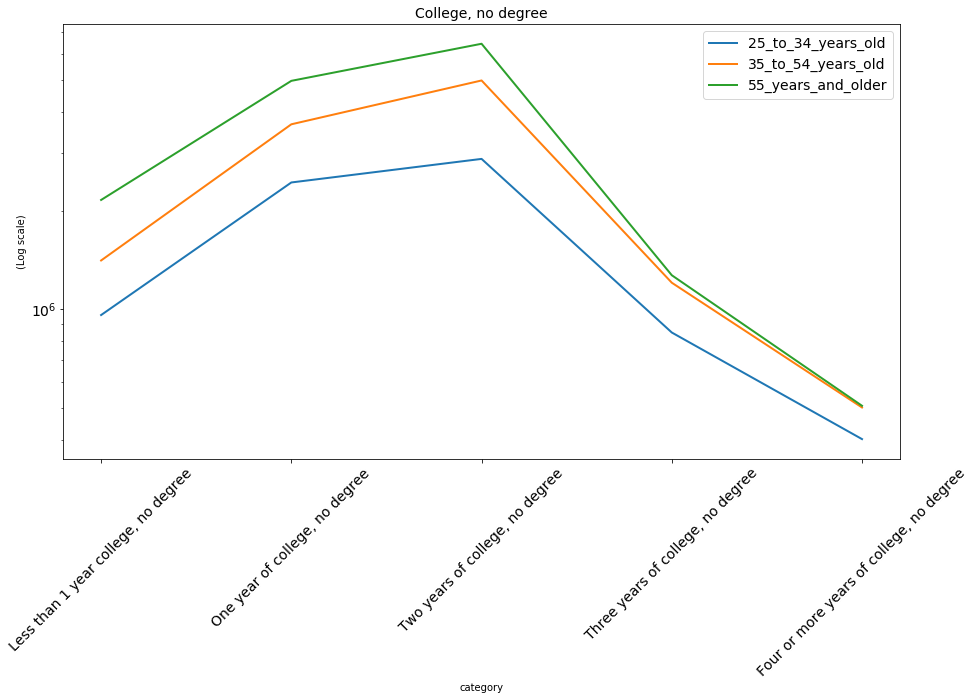

Associate's degree, vocational


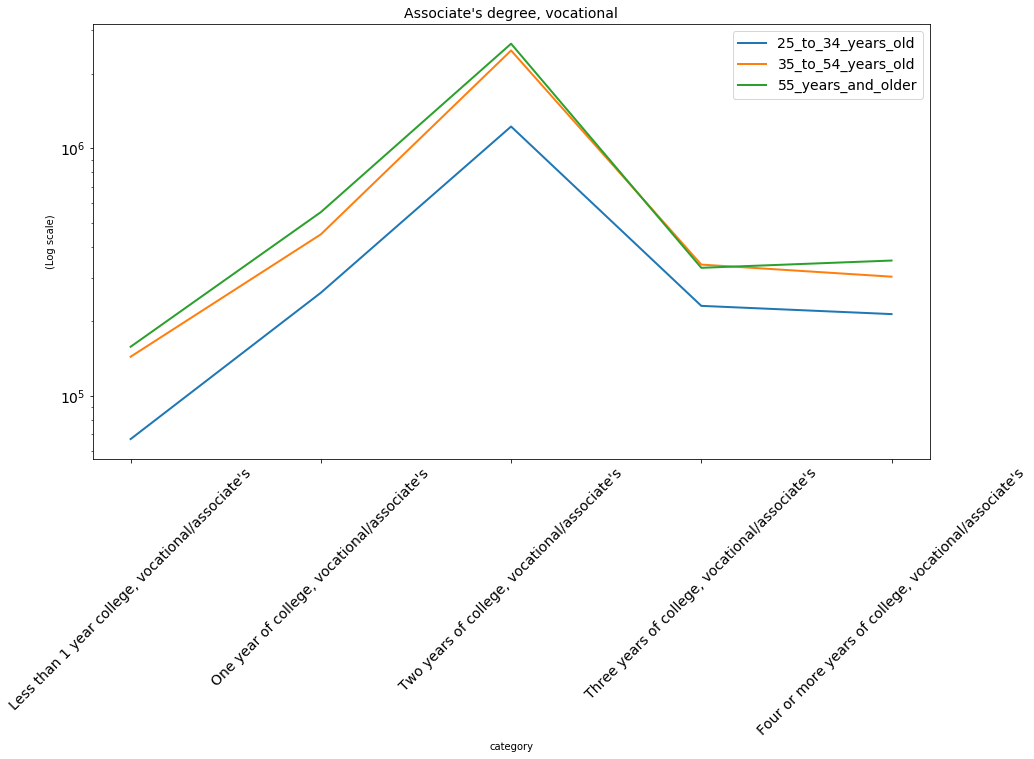

Associate's degree, academic


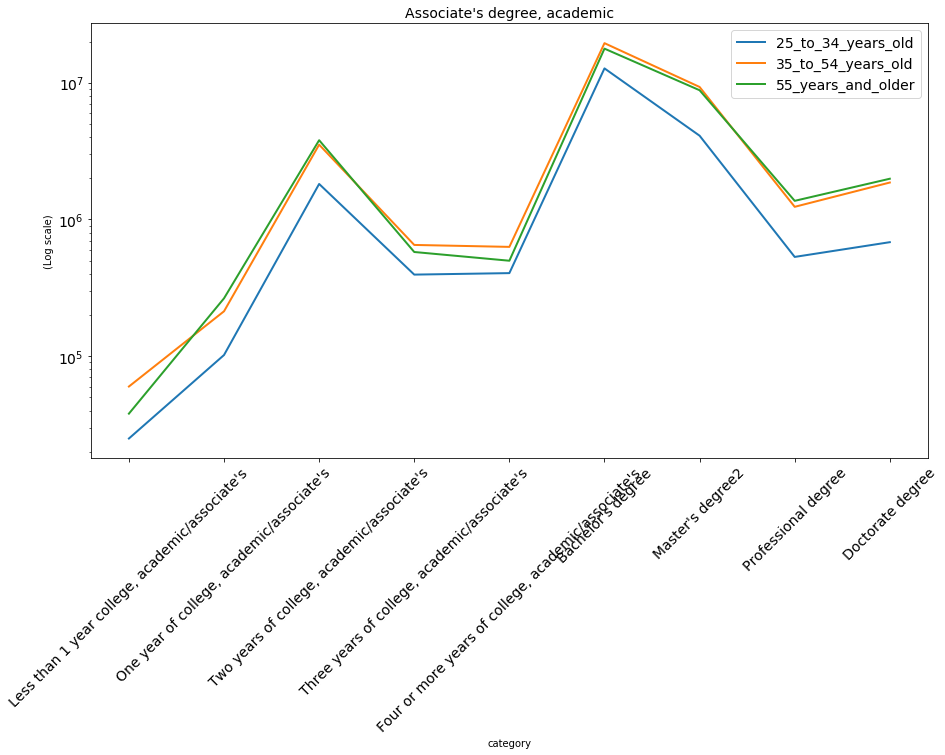

In [14]:
"""
Slice By Age
"""
print("''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")
print("Education Level by Age Group\n")
print("''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")
dfByAge= dfEd[["category", "aggr_cat", "25_to_34_years_old", "35_to_54_years_old", "55_years_and_older" ]]
plotData(dfByAge.drop(0), logY=True)

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
Education Level by Gender

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
Elementary or High school, no diploma


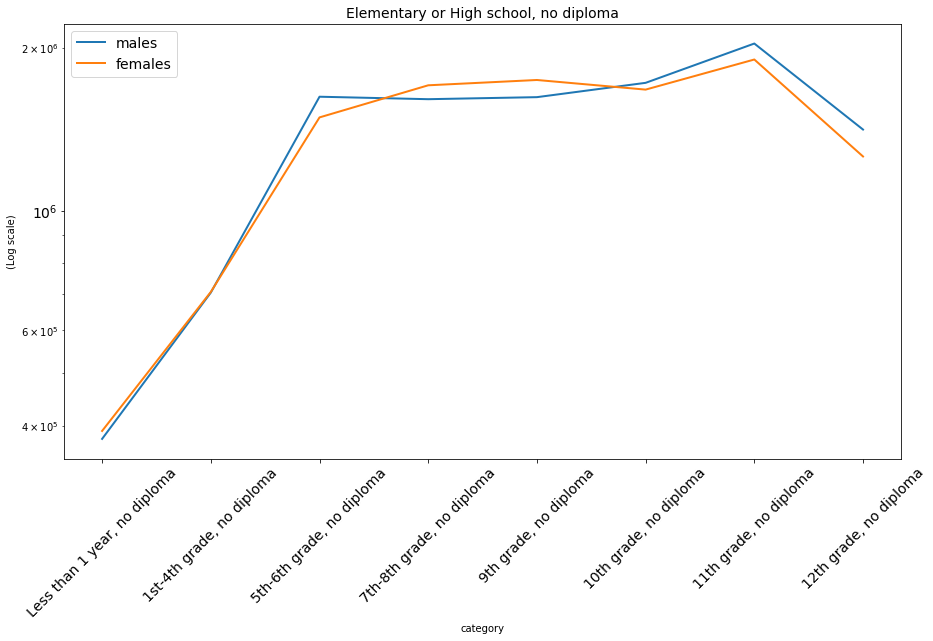

Elementary or High school, GED


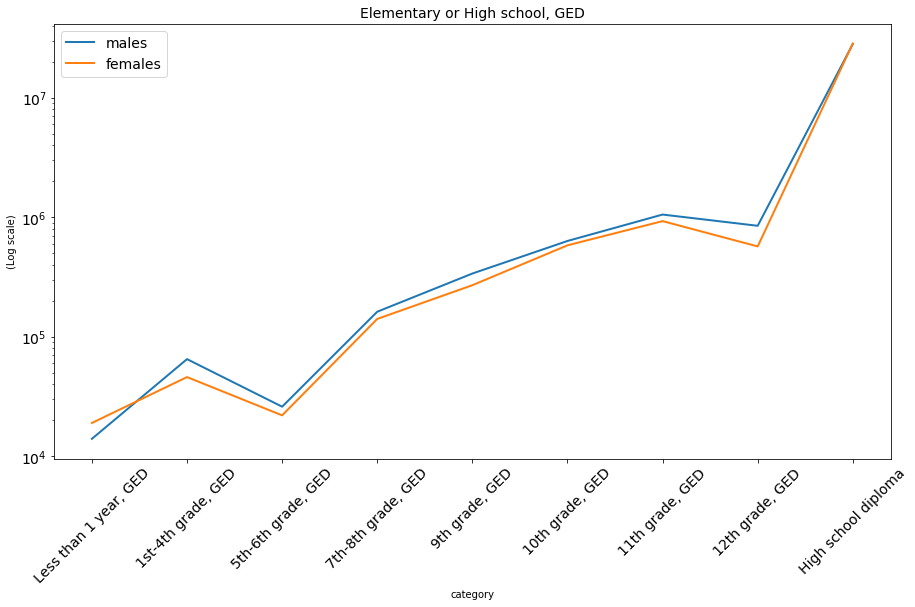

College, no degree


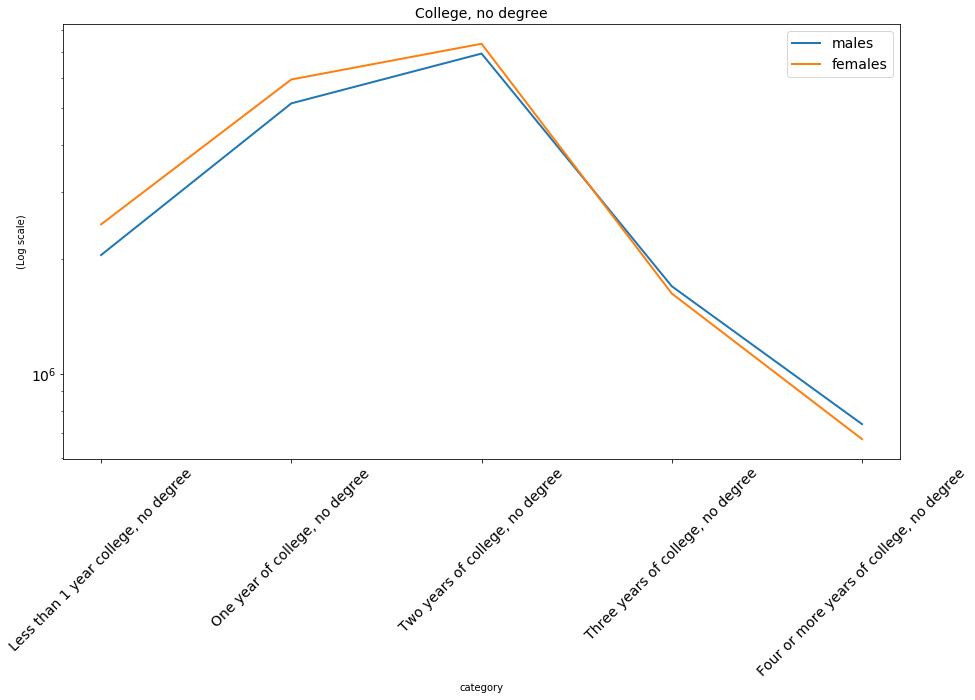

Associate's degree, vocational


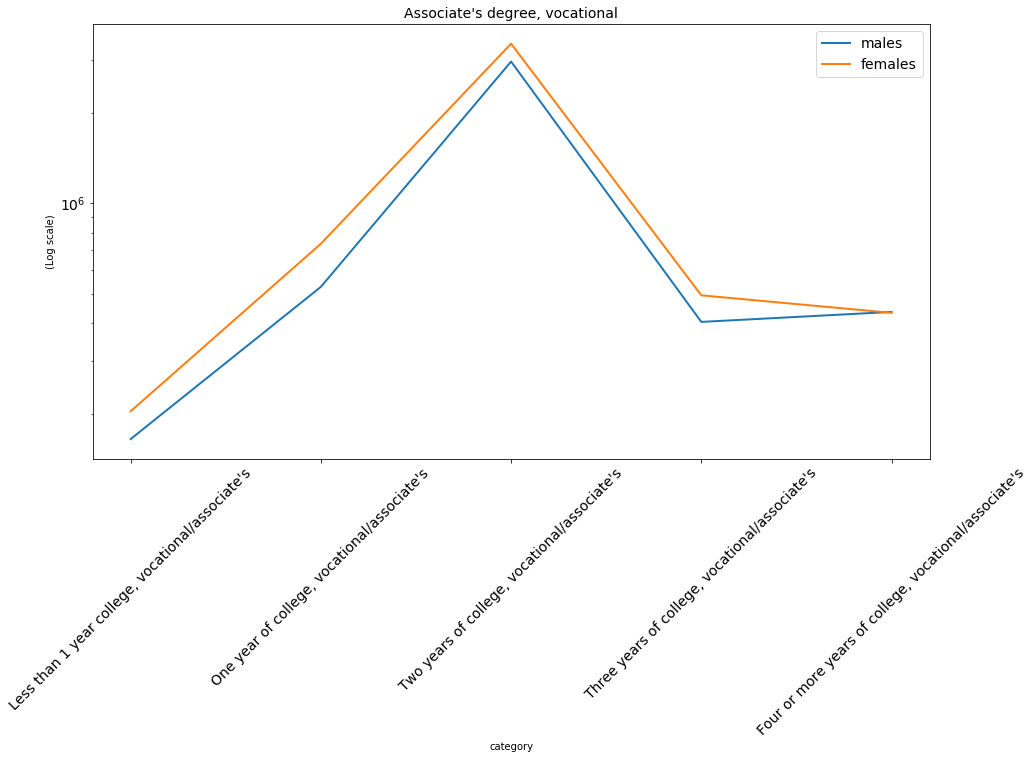

Associate's degree, academic


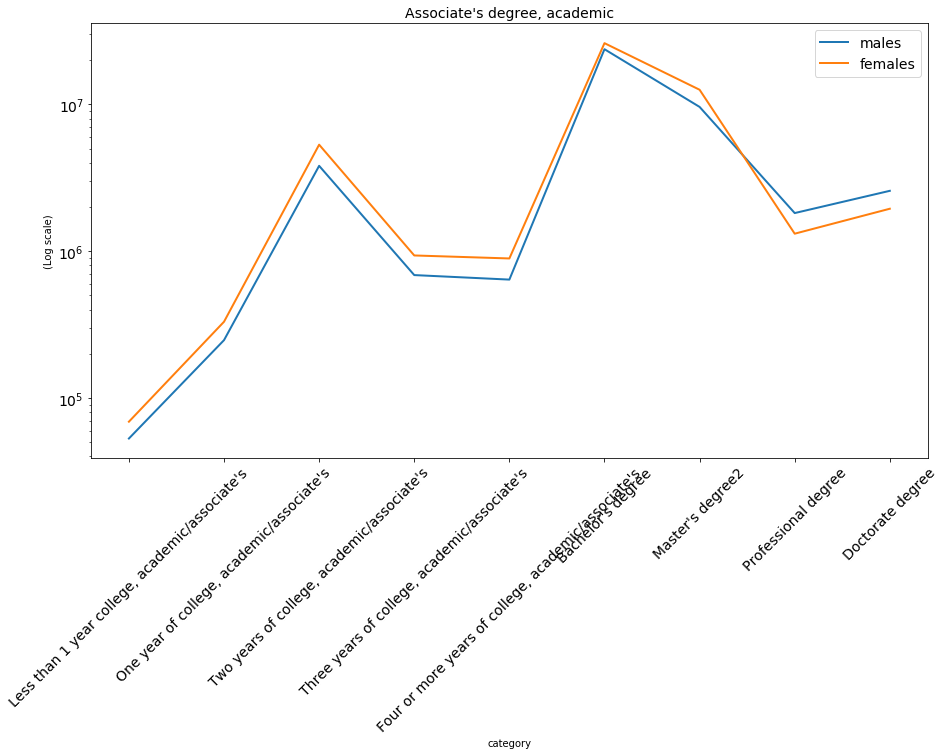

In [17]:
"""
Slice By Gender
"""
print("''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")
print("Education Level by Gender\n")
print("''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")
dfBySex= dfEd[["category", "aggr_cat", "males", "females" ]]
plotData(dfBySex.drop(0), logY=True)

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
Education Level by Race

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
Elementary or High school, no diploma


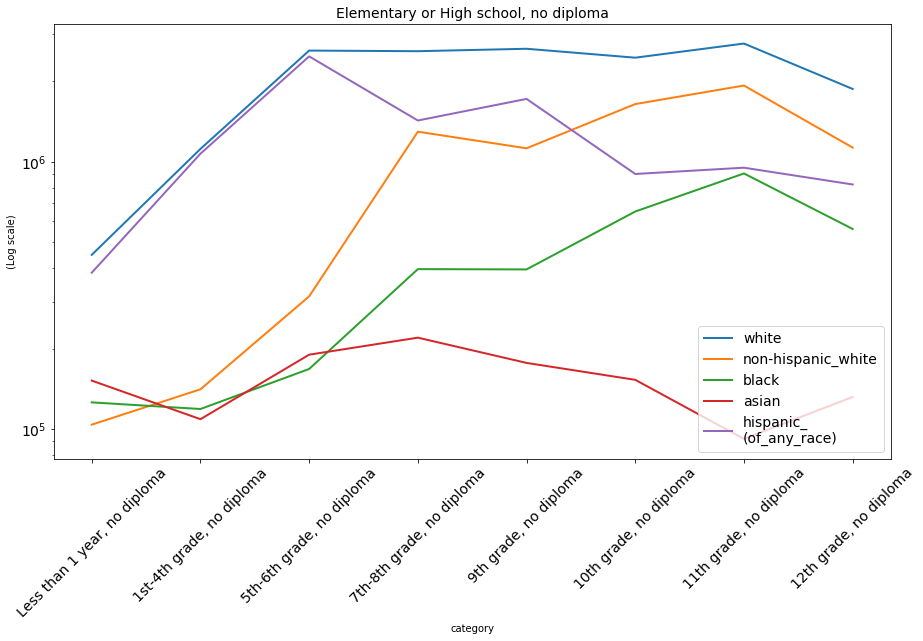

Elementary or High school, GED


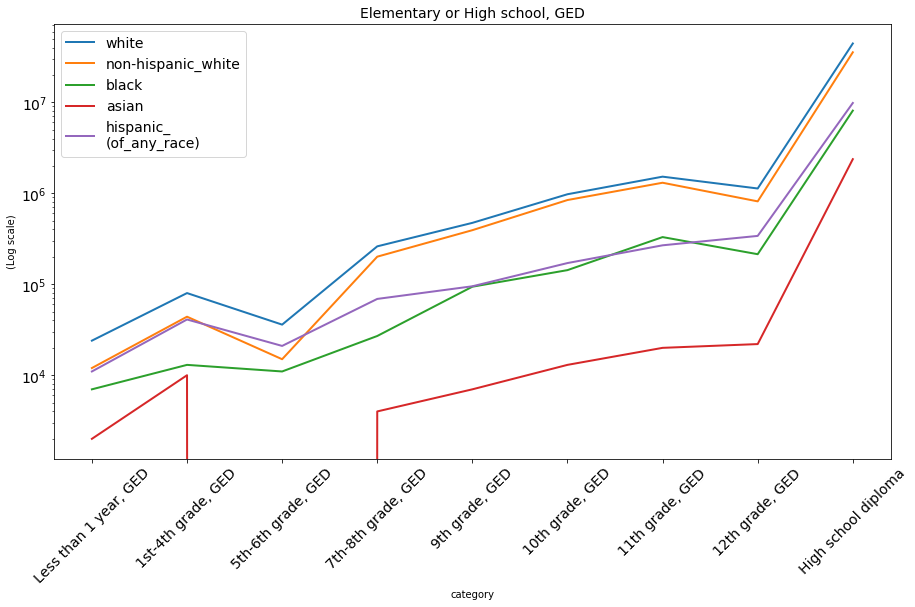

College, no degree


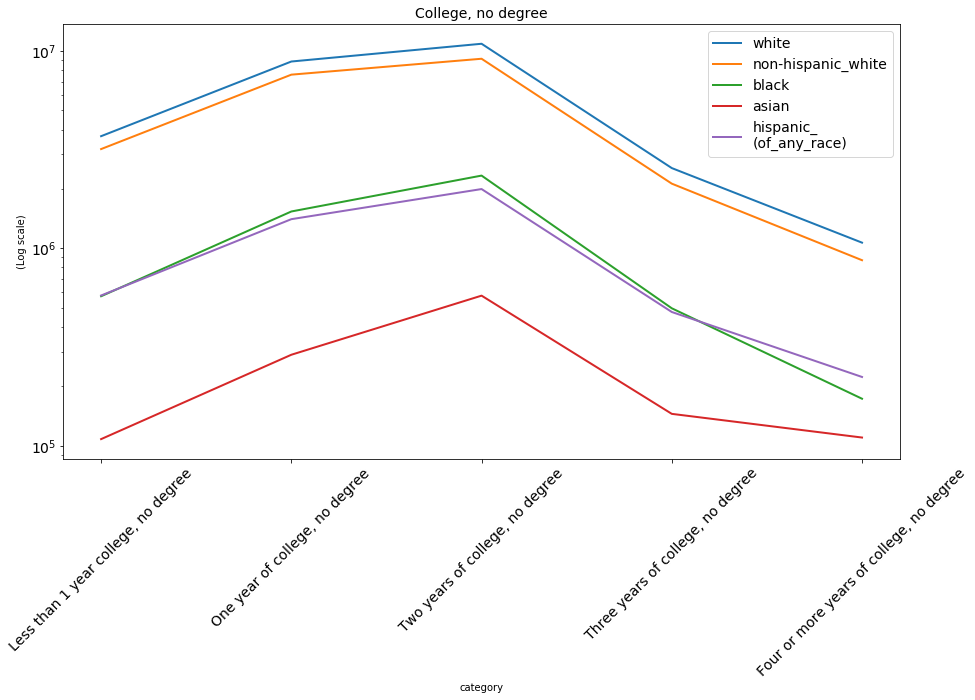

Associate's degree, vocational


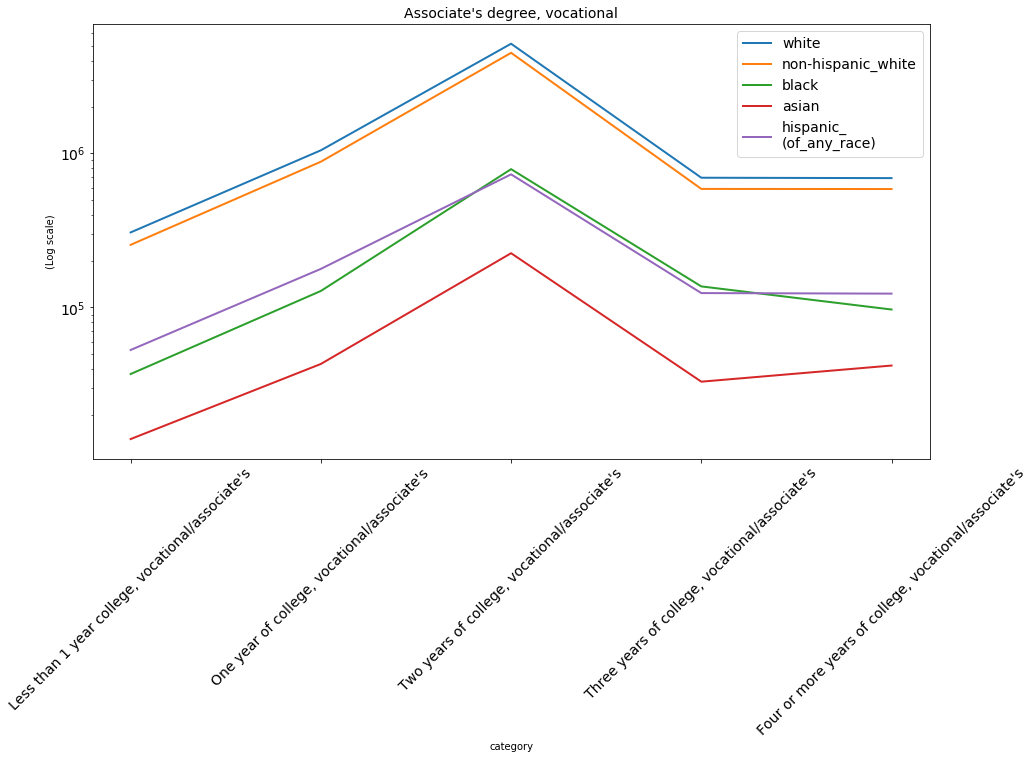

Associate's degree, academic


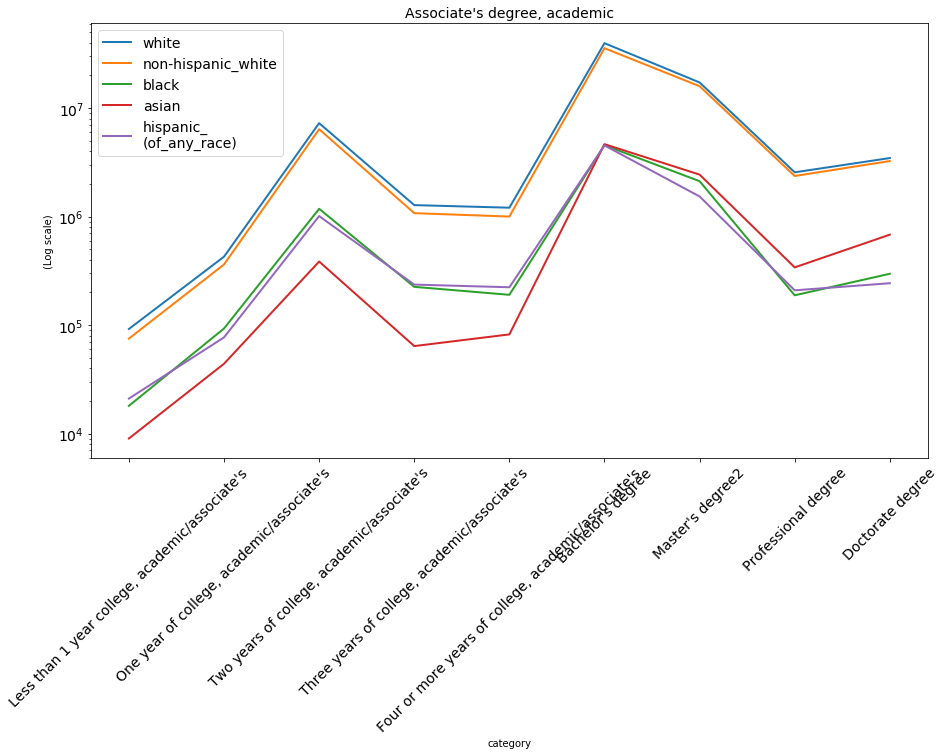

In [18]:
"""
Slice By Race
"""
print("''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")
print("Education Level by Race\n")
print("''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")
dfByRace= dfEd[["category", "aggr_cat", "white",
       "non-hispanic_white", "black", "asian", "hispanic_\n(of_any_race)"]]
plotData(dfByRace.drop(0), logY=True)